# ZERO - untrained baseline

In [1]:
import os, time, torch, numpy as np, random
from DQN.dqn_model_qr import QRDQN
from C4.connect4_env import Connect4Env
from DQN.dqn_agent_qr import DQNAgent
from DQN.agent_eval import set_eval_mode, self_test

In [2]:
SEED = 666
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(SEED)

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = QRDQN().to(device)
model.eval()  

QRDQN(
  (backbone): C4DirectionalBackbone(
    (h4): Conv2d(6, 16, kernel_size=(1, 4), stride=(1, 1), padding=(0, 1))
    (v4): Conv2d(6, 16, kernel_size=(4, 1), stride=(1, 1), padding=(1, 0))
    (k2): Conv2d(6, 16, kernel_size=(2, 2), stride=(1, 1))
    (shrink_h): AvgPool2d(kernel_size=(2, 1), stride=(1, 1), padding=0)
    (shrink_w): AvgPool2d(kernel_size=(1, 2), stride=(1, 1), padding=0)
    (mix): Conv2d(48, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (res): ResidualBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    )
    (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (gap): AdaptiveAvgPool2d(output_size=(1, 1))
  (fc): Sequential(
    (0): Linear(in_features=64, out_features=128, bias=True)
    (1): ReLU(inplace=True)
  )
  (quantile_head): Linear(in_features=128, out_features=357, bias=True)
)

In [4]:
env = Connect4Env()
agent = DQNAgent(device=device)  # Fresh agent 
env.reset()
set_eval_mode(agent)
self_test(agent, env, atol=1e-6, n_random=48, rng_seed=666)

[ENC] max Δ(env vs agent) = 0.0
q:  [-0.0008 -0.0003  0.0006  0.0011  0.0006 -0.0003 -0.0008]
qm: [-0.0008 -0.0003  0.0006  0.0011  0.0006 -0.0003 -0.0008]   (mirror argmax: 3 → should equal: 3 )
max diff after unflip: 0.0
ARGMAX: 3 | MIRROR ARGMAX: 3 | OK: True
q:  [-0.0008 -0.0003  0.0006  0.0011  0.0006 -0.0003 -0.0008]
qm: [-0.0008 -0.0003  0.0006  0.0011  0.0006 -0.0003 -0.0008]   (mirror argmax: 3 → should equal: 3 )
max diff after unflip: 0.0
ARGMAX: 3 | MIRROR ARGMAX: 3 | OK: True
[SYM] random-states: max=0, mean=0, >1e-5: 0/48
✅ Self-test passed.


Pure-exploit action histogram over 200 randomized states:
{0: 0, 1: 0, 2: 0, 3: 200, 4: 0, 5: 0, 6: 0}


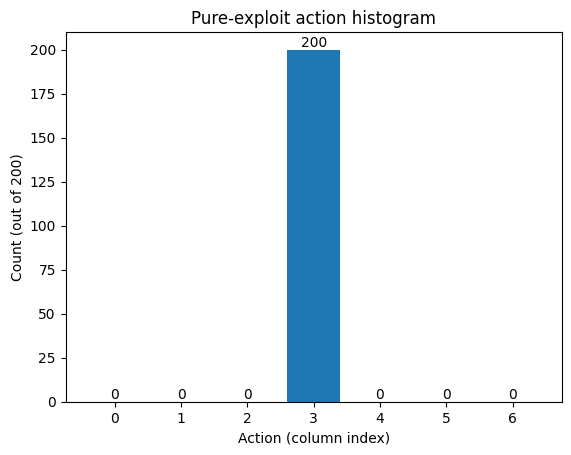

{0: 0, 1: 0, 2: 0, 3: 200, 4: 0, 5: 0, 6: 0}

In [6]:
agent.exploit_histogram_probe(env, trials=200, seed=666, plot=True)

In [7]:
model_filename = "ZERO DQN model.pt"

In [8]:
sd = model.state_dict()
torch.save(sd, model_filename)

In [9]:
print(f"Saved: {model_filename}")

Saved: ZERO DQN model.pt
